#### Name: Pranav Nair
#### Course: DSCI_633
#### Assignment 04

## STEP 1: Set Up


In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## STEP 2: Load the data

In [2]:
from sklearn.datasets import load_iris

# Loading  the data
data = load_iris()

# Displaying the features and target
print("Feature names: ",data['feature_names'])
print("Target labels: ", data['target_names'])

Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target labels:  ['setosa' 'versicolor' 'virginica']


In [3]:
# Let's convert the data dictionary into a dataframe
features = data['data']
target = data['target']

df_features = pd.DataFrame(features, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
df_target = pd.DataFrame(target)

df_features['target'] = df_target

df = df_features
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Lets replace the numbers in the target column with their labels
df["target"] = df['target'].astype(str).replace("0", "setosa").replace("1", "versicolor").replace("2", "virginica")

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## STEP 3: Data Manipulation & Analysis

In [6]:
# Lets check for the number of rows and columns
df.shape

(150, 5)

There are 150 rows and 5 columns in this dataset

In [7]:
# Let us check if any null values are present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There are no null values in this dataset. It is clean

Since all the feature columns are continuous, let's first check the distribution of all these features

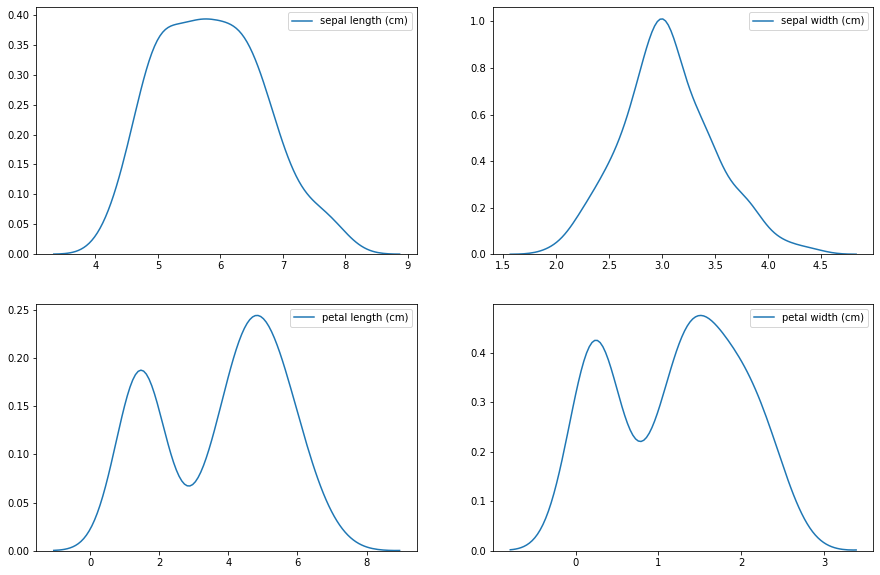

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.kdeplot(df['sepal length (cm)'], ax = ax[0, 0])
sns.kdeplot(df['sepal width (cm)'], ax = ax[0, 1])
sns.kdeplot(df['petal length (cm)'], ax = ax[1, 0])
sns.kdeplot(df['petal width (cm)'], ax = ax[1, 1]);

We can see that none of the four features have a perfect normal distribution. 
- Sepal length has a negligible skewness, but there seems to be some amount of negative value for kurtosis
- Sepal Width also has a negligible skewness, but it has a positive value for kurtosis
- Petal length and Petal width have a bimodal distribution.

In [9]:
# Let's check the statistics of the data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- It can be seen that except for `petal length (cm)`, the mean and the median are almost the same for the remaining three features. For `petal length (cm)` as well, the median is only ~0.5cm away from the mean.
- It can also be seen that standard deviation for all the features is a low value. 
- This means that majority if the data points in the features are centered around the center

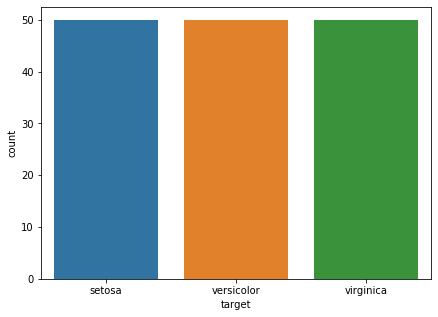

In [10]:
# Let's check the distribution of our target variable
plt.figure(figsize=(7, 5))
sns.countplot(df['target']);

It can be seen that there are 50 samples each of `setosa`, `versicolor` and `virginica`

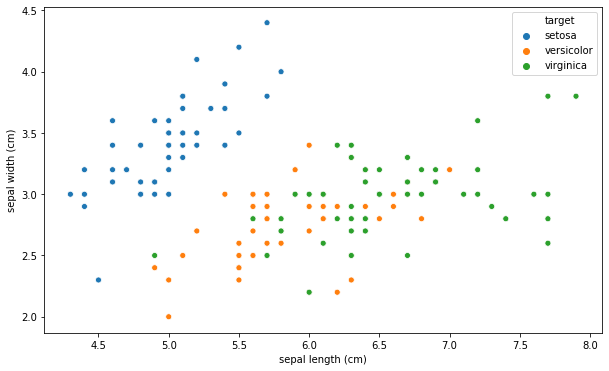

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y=df['sepal width (cm)'], x=df['sepal length (cm)'], hue=df['target']);

It can be seen that 
- `setosa` has sepal length between 4 and 6 cm and sepal width between 2 and 4.5 cm
- `versicolor` has sepal length between 5 and 7 cm and sepal width between 2 and a little less than 3.5 cm
- `virginica` has sepal length between ideally between 5.5 and 8 cm and sepal width between 2 and 4 cm

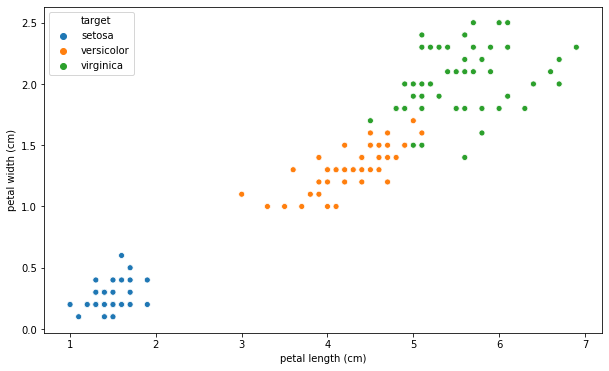

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y=df['petal width (cm)'], x=df['petal length (cm)'], hue=df['target']);

It can be seen that 
- `setosa` has a petal_length between 1 and 2 cm and petal width between 0-0.5cm
- `versicolor` has a petal length between 3 and 5 cm and petal_width between 1 - 2 cm
- `virginica` has a petal length between 3 and 5 cm and petal_width between 1.5 - 3cm

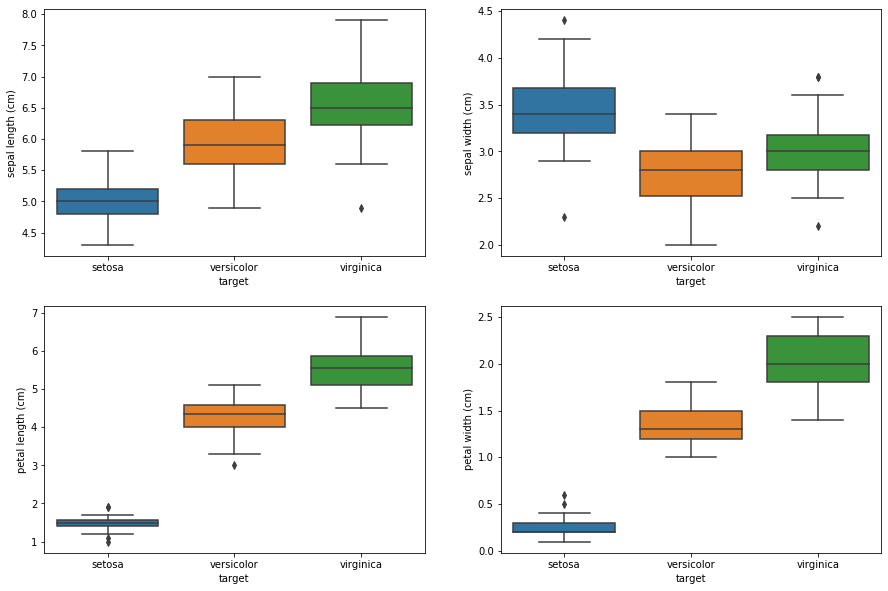

In [13]:
# Let's now check the distribution of the features for every single target category using a boxplot
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x=df['target'], y = df['sepal length (cm)'], data=pd.melt(df), ax=ax[0, 0])
sns.boxplot(x=df['target'], y = df['sepal width (cm)'], data=pd.melt(df), ax=ax[0, 1])
sns.boxplot(x=df['target'], y = df['petal length (cm)'], data=pd.melt(df), ax=ax[1, 0])
sns.boxplot(x=df['target'], y = df['petal width (cm)'], data=pd.melt(df), ax=ax[1, 1]);

As we can see there are some outlier values for in some features for every target variable. We will not remove these outliers since there are only 150 samples in the data.

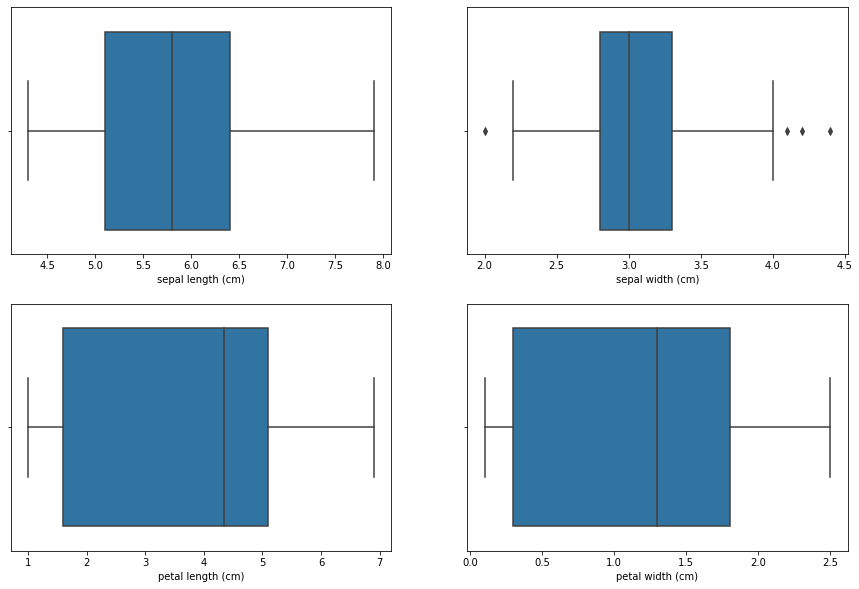

In [14]:
# The above graph shows outliers for every category. Let us now check if there are outliers in the overall features
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(df['sepal length (cm)'], ax=ax[0, 0])
sns.boxplot(df['sepal width (cm)'], ax=ax[0, 1])
sns.boxplot(df['petal length (cm)'], ax=ax[1, 0])
sns.boxplot(df['petal width (cm)'], ax=ax[1, 1]);

We can see that only `sepal width (cm)` has some outliers. We can treat these outliers later

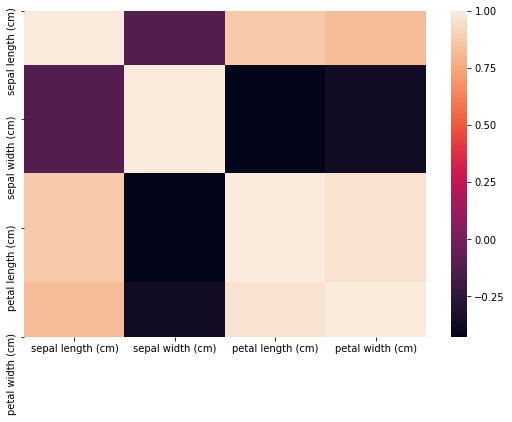

In [15]:
#Let's check the correlation between the features now using a heatmap
plt.figure(figsize=(9, 6))
sns.heatmap(df.corr());

We can see that `petal length (cm)` and `petal width (cm)`  have a strong positive correlation and `sepal width (cm)` has a strong negative correlation with `petal length (cm)` and `petal width (cm)`

## STEP 3: Divide into train and test

In [16]:
# Before splitting into train and test, let's convert the labels in the target back to their numbers
df["target"] = df['target'].replace("setosa", 0).replace("versicolor", 1).replace("virginica", 2)

In [17]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
#Separating features and target
X = df.loc[:, df.columns!="target"]
y = df.loc[:, df.columns=="target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## STEP 4: Prepare data for ML, data cleaning, Standardization 

#### Transformation 1 - Outlier removal

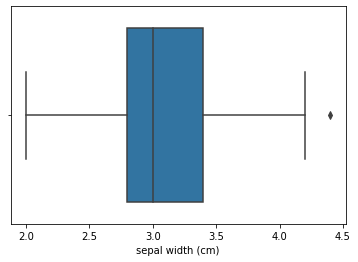

In [19]:
sns.boxplot(X_train['sepal width (cm)']);

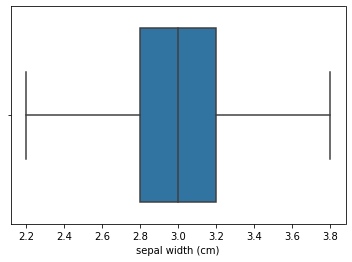

In [20]:
sns.boxplot(X_test['sepal width (cm)']);

There are no outliers in X_test but some in X_train. Let's treat them

In [21]:
#Let us remove the outliers in sepal width using Winsorization
quantile_1 = X_train['sepal width (cm)'].quantile(0.25)
quantile_3 = X_train['sepal width (cm)'].quantile(0.75)
IQR = quantile_3 - quantile_1

lower_limit = quantile_1 - 1.5*IQR
upper_limit = quantile_3 + 1.5*IQR

def winsorize(x):
    if x>upper_limit:
        return upper_limit
    elif x<lower_limit:
        return lower_limit
    else:
        return x
    
X_train['sepal width (cm)'] = X_train['sepal width (cm)'].apply(winsorize)

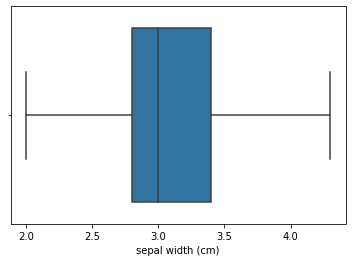

In [22]:
sns.boxplot(X_train['sepal width (cm)']);

We can see that the outliers have been removed from the X_train of `sepal width (cm)`

#### Transformation 2 - Standardization

In [23]:
# Let us now standardise all the features 
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

## STEP 6: Model Building

In [24]:
from sklearn.svm import SVR, SVC

In [25]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr_linear = svr.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error, accuracy_score
from math import sqrt

sqrt(mean_squared_error(y_test, y_pred_svr_linear))

0.19818355732071652

In [27]:
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train, y_train)
y_pred_svr_rbf = svr_rbf.predict(X_test)
sqrt(mean_squared_error(y_test, y_pred_svr_rbf))

0.17610516088777592

As we can see the RMSE values are quite low. This is expected because our problem is a classification problem and not a regression problem. Hence accuracy is the preferred metric for this

In [28]:
# Lets now try the Support Vector Classifier

svc = SVC(kernel = "linear")
svc.fit(X_train, y_train)
y_pred_svc_linear = svc.predict(X_test)

accuracy_score(y_test, y_pred_svc_linear)

0.9

In [29]:
svc_rbf = SVC(kernel = "rbf")
svc_rbf.fit(X_train, y_train)
y_pred_svc_rbf = svc_rbf.predict(X_test)

accuracy_score(y_test, y_pred_svc_rbf)

0.9666666666666667

The SVC classifier has given an accuracy of 0.9 using linear and 0.96 using RBF kernels

In [30]:
# Tuning SVM using Grid SearchCV
from sklearn.model_selection import StratifiedKFold, GridSearchCV, KFold

print("SVM Fine-tuned model: ")

svc = SVC()

p1 = ['sigmoid', 'poly', 'rbf', 'linear']
p2 = [10, 1.0, 0.1, 0.01, 100]
# define grid search
grid_search_svc = GridSearchCV(estimator=svc, param_grid={"kernel":p1, "C":p2}, n_jobs=-1, cv=KFold(n_splits=3, random_state=42), scoring='accuracy')
grid_result = grid_search_svc.fit(X_train, y_train)

y_pred_test_svc_gs = grid_search_svc.predict(X_test)

print("The best values for the parameters are: ", grid_search_svc.best_params_)

print("On Test data, the accuracy is: ",accuracy_score(y_test, y_pred_test_svc_gs))

SVM Fine-tuned model: 
The best values for the parameters are:  {'C': 10, 'kernel': 'rbf'}
On Test data, the accuracy is:  0.9333333333333333


Applying Grid Search on SVC is giving an accuracy of 0.93 with the best values for C being 10 and the best kernel being rbf

In [31]:
# Applying KNN
from sklearn.neighbors import KNeighborsClassifier

print("KNN model Results: ")

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred_test_knn = knn.predict(X_test)
print("On Test data, the accuracy is: ",accuracy_score(y_test, y_pred_test_knn))

KNN model Results: 
On Test data, the accuracy is:  0.9666666666666667


In [32]:
# Finetuning KNN using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV


print("KNN Fine-tuned model: ")

p1 = range(1, 10)
p2 = ['euclidean', 'manhattan', 'minkowski']
# define grid search
randomized_search_knn = RandomizedSearchCV(estimator=knn, param_distributions={"n_neighbors":p1,"metric":p2}, n_jobs=-1, cv=StratifiedKFold(n_splits=3, random_state=42), scoring='accuracy')
randomized_search_knn.fit(X_train, y_train)

y_pred_test_knn_rs = randomized_search_knn.predict(X_test)

print("The best values for the parameters are: ", randomized_search_knn.best_params_)

print("On Test data, the accuracy is: ",accuracy_score(y_test, y_pred_test_knn_rs))

KNN Fine-tuned model: 
The best values for the parameters are:  {'n_neighbors': 8, 'metric': 'manhattan'}
On Test data, the accuracy is:  0.9666666666666667


KNN has performed better than the SVC model after finetuning, giving an accuracy of 0.96

## Done